<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/allocationoilandgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setting up the Colab page to use neqsim
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *

#Allocation of oil and gas

https://en.wikipedia.org/wiki/Allocation_(oil_and_gas)


In the petroleum industry, allocation refers to practices of breaking down measures of quantities of extracted hydrocarbons across various contributing sources. Allocation aids the attribution of ownerships of hydrocarbons as each contributing element to a commingled flow or to a storage of petroleum may have a unique ownership. Contributing sources in this context are typically producing petroleum wells delivering flows of petroleum or flows of natural gas to a commingled flow or storage.

The terms hydrocarbon accounting and allocation are sometimes used interchangeably. Hydrocarbon accounting has a wider scope, taking advantages of allocation results, it is the petroleum management process by which ownership of extracted hydrocarbons is determined and tracked from a point of sale or discharge back to the point of extraction. In this way, hydrocarbon accounting also covers inventory control, material balance, and practices to trace ownership of hydrocarbons being transported in a transportation system, e.g. through pipelines to customers distant from the production plant.

In an allocation problem, contributing sources are more widely natural gas streams, fluid flows or multiphase flows derived from formations or zones in a well, from wells, and from fields, unitised production entities or production facilities. In hydrocarbon accounting, quantities of extracted hydrocarbon can be further split by ownership, by "cost oil" or "profit oil" categories, and broken down to individual composition fraction types. Such components may be alkane hydrocarbons, boiling point fractions, and mole weight fractions.



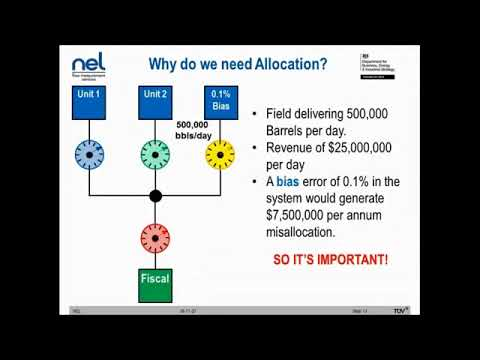

In [2]:
#@title Introduction to Allocation
#@markdown This video gives an intriduction to allocation of oil and gas
from IPython.display import YouTubeVideo
YouTubeVideo('pdIzRGTgmco', width=600, height=400)

# Process simulation for allocation

In [3]:
inputdata = {
  'feedFlowRateWellA': 10,
  'wellPressure': 280.0,
  'wellTemperature':200.0,
  'topsidePressure': 90.0,
  'topsideTemperature': 5.0,
  'firstStagePressure': 75.0, 
  'temperatureOilHeater' : 75.9,
  'secondStagePressure': 8.6,
  'thirdStagePressure': 1.9,
  'firstStageSuctionCoolerTemperature': 25.3, 
  'secondStageSuctionCoolerTemperature': 24.5, 
  'thirdStageSuctionCoolerTemperature':25.0,
  'firstStageExportCoolerTemperature': 25.3, 
  'secondStageExportCoolerTemperature': 24.5
}

In [4]:
from neqsim.thermo import fluid, printFrame
from neqsim.process import compressor, cooler, separator3phase, getProcess, clearProcess, mixer, heater, stream, pump, separator, runProcess, stream, saturator, valve, filters, heatExchanger, simpleTEGAbsorber,distillationColumn, waterStripperColumn, recycle2, setpoint, calculator

clearProcess()

wellFluid = fluid('pr')
wellFluid.addComponent("nitrogen", 0.08)
wellFluid.addComponent("CO2", 3.56)
wellFluid.addComponent("methane", 87.36)
wellFluid.addComponent("ethane", 4.02)
wellFluid.addComponent("propane", 1.54)
wellFluid.addComponent("i-butane", 0.2)
wellFluid.addComponent("n-butane", 0.42)
wellFluid.addComponent("i-pentane", 0.15)
wellFluid.addComponent("n-pentane", 0.20)
		
wellFluid.addTBPfraction("C6", 3.24, 84.99/1000.0, 695.0/1000.0)
wellFluid.addTBPfraction("C7", 1.34, 97.87/1000.0, 718.0/1000.0)
wellFluid.addTBPfraction("C8", 1.33, 111.54/1000.0, 729.0/1000.0)
wellFluid.addTBPfraction("C9", 1.19, 126.1/1000.0, 749.0/1000.0)
wellFluid.addTBPfraction("C10", 1.15, 140.14/1000.0, 760.0/1000.0)
wellFluid.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid.addTBPfraction("C12", 1.5, 280.0/1000.0, 914.0/1000.0)
wellFluid.addTBPfraction("C13", 2.103, 560.0/1000.0, 980.0/1000.0)

wellFluid.setMixingRule(2)
wellFluid.init(0)

wellFluid.setMolarComposition([0.08, 3.56, 87.36, 4.02, 1.54, 0.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 1.15, 1.69, 1.5, 1.03])

wellStream = stream(wellFluid)
wellStream.setName("dry well stream")
wellStream.setFlowRate(inputdata['feedFlowRateWellA'], "MSm3/day")
wellStream.setTemperature(inputdata['wellTemperature'], "C")
wellStream.setPressure(inputdata['wellPressure'], "bara")

saturatedFeedGas = saturator(wellStream)
saturatedFeedGas.setName("water saturator")

waterSaturatedFeedGas = stream(saturatedFeedGas.getOutStream())
waterSaturatedFeedGas.setName("water saturated feed gas")

feedTPsetter = heater(waterSaturatedFeedGas)
feedTPsetter.setName('inletTP')
feedTPsetter.setOutPressure(inputdata['topsidePressure'], "bara")
feedTPsetter.setOutTemperature(inputdata['topsideTemperature'], "C")

chokeValve = valve(feedTPsetter.getOutStream())
chokeValve.setOutletPressure(inputdata['firstStagePressure'], 'bara')

feedToOffshoreProcess = stream(chokeValve.getOutStream())
feedToOffshoreProcess.setName("feed to offshore")

firstStageSeparator = separator3phase(feedToOffshoreProcess)
firstStageSeparator.setName("1st stage separator")

oilHeaterFromFirstStage = heater(firstStageSeparator.getOilOutStream())
oilHeaterFromFirstStage.setName("oil heater second stage")
oilHeaterFromFirstStage.setOutTemperature(inputdata['temperatureOilHeater'],'C')

oilThrotValve = valve(oilHeaterFromFirstStage.getOutStream())
oilThrotValve.setName("valve oil from first stage")
oilThrotValve.setOutletPressure(inputdata['secondStagePressure'])

secondStageSeparator = separator3phase(oilThrotValve.getOutStream())
secondStageSeparator.setName("2nd stage separator")

oilThrotValve2 = valve(secondStageSeparator.getOilOutStream())
oilThrotValve2.setName("valve oil from second stage")
oilThrotValve2.setOutletPressure(inputdata['thirdStagePressure'])

thirdStageSeparator = separator3phase(oilThrotValve2.getOutStream())
thirdStageSeparator.setName("3rd stage separator")

oilThirdStageToSep =  wellStream.clone()
oilThirdStageToSep.setName("resyc oil")
thirdStageSeparator.addStream(oilThirdStageToSep)

stableOil = stream(thirdStageSeparator.getOilOutStream())
stableOil.setName("stable oil")

stableOilPump = pump(stableOil,15.0,"stable oil pump")

firstStageCooler = cooler(thirdStageSeparator.getGasOutStream())
firstStageCooler.setName("1st stage cooler")
firstStageCooler.setOutTemperature(inputdata['firstStageSuctionCoolerTemperature'],'C')

firstStageScrubber = separator(firstStageCooler.getOutStream())
firstStageScrubber.setName("1st stage scrubber")

firstStageCompressor = compressor(firstStageScrubber.getGasOutStream())
firstStageCompressor.setName("1st stage compressor")
firstStageCompressor.setOutletPressure(inputdata['secondStagePressure'])
firstStageCompressor.setIsentropicEfficiency(0.75)

secondStageCooler = cooler(firstStageCompressor.getOutStream())
secondStageCooler.setName("2nd stage cooler")
secondStageCooler.setOutTemperature(inputdata['secondStageSuctionCoolerTemperature'],'C')

secondStageScrubber = separator(secondStageCooler.getOutStream())
secondStageScrubber.setName("2nd stage scrubber")

secondStageCompressor = compressor(secondStageScrubber.getGasOutStream())
secondStageCompressor.setName("2nd stage compressor")
secondStageCompressor.setOutletPressure(inputdata['firstStagePressure'])
secondStageCompressor.setIsentropicEfficiency(0.75)

richGasMixer = mixer("fourth Stage mixer")
richGasMixer.addStream(secondStageCompressor.getOutStream())
richGasMixer.addStream(firstStageSeparator.getGasOutStream())

dewPointControlCooler = cooler(richGasMixer.getOutStream())
dewPointControlCooler.setName("dew point cooler")
dewPointControlCooler.setOutTemperature(inputdata['thirdStageSuctionCoolerTemperature'],'C')

dewPointScrubber = separator(dewPointControlCooler.getOutStream())
dewPointScrubber.setName("dew point scrubber")

lpLiqmixer = mixer("LP liq gas mixer");
lpLiqmixer.addStream(firstStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(secondStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(dewPointScrubber.getLiquidOutStream());

lpResycle = recycle2("LP liq resycle")
lpResycle.addStream(lpLiqmixer.getOutStream())
lpResycle.setOutletStream(oilThirdStageToSep)

exportCompressor1 = compressor(dewPointScrubber.getGasOutStream())
exportCompressor1.setName("export 1st stage")
exportCompressor1.setOutletPressure(140.0)
exportCompressor1.setIsentropicEfficiency(0.75)

exportInterstageCooler = cooler(exportCompressor1.getOutStream())
exportInterstageCooler.setName("interstage stage cooler")
exportInterstageCooler.setOutTemperature(inputdata['firstStageExportCoolerTemperature'],'C')

exportCompressor2= compressor(exportInterstageCooler.getOutStream())
exportCompressor2.setName("export 2nd stage")
exportCompressor2.setOutletPressure(200.0)
exportCompressor2.setIsentropicEfficiency(0.75)

exportCooler = cooler(exportCompressor1.getOutStream())
exportCooler.setName("export cooler")
exportCooler.setOutTemperature(inputdata['secondStageExportCoolerTemperature'],'C')

exportGas = stream(exportCooler.getOutStream())
exportGas.setName("export gas")

oilprocess = getProcess()

In [5]:
oilprocess.run()

In [6]:
TVP = stableOil.TVP(20.0, 'C')
cricondenbar = exportGas.CCB('bara')
gasexport = exportGas.getFlowRate('MSm3/day')
oilexport = stableOil.getFlowRate('m3/hr')

print('TVP [bara] ', TVP)
print('cricondenbar [bara] ', cricondenbar)
print('gas export [MSm3/day] ', gasexport)
print('oil export [m3/hr] ', oilexport)

TVP [bara]  1.0019103056510192
cricondenbar [bara]  88.6410913139977
gas export [MSm3/day]  8.180799323587202
oil export [m3/hr]  397.6968985368483


#ORF factors
In the following code the ORF factors are calculated

In [8]:
componentNames = ['methane', 'ethane', 'propane', 'i-butane', 'n-butane', 'i-pentane', 'n-pentane', 'C6_PC','C9_PC']

print ('ORF.......................')
for name in componentNames:
  total = wellStream.getFluid().getComponent(name).getFlowRate('kg/hr')
  ORF = stableOil.getFluid().getComponent(name).getFlowRate('kg/hr')/total
  print('ORF ', name, ' ', ORF)


ORF.......................
ORF  methane   0.0003887035612746275
ORF  ethane   0.015952158128644135
ORF  propane   0.11815281265776598
ORF  i-butane   0.3041733469992136
ORF  n-butane   0.41563142326894825
ORF  i-pentane   0.6917879673764595
ORF  n-pentane   0.7716164520002414
ORF  C6_PC   1.0306331075569908
ORF  C9_PC   1.3056743337535277


# Adding a new well stream
In the following example we will add a new well stream and add it to the inlet separator.

In [9]:
wellFluid2 = fluid('pr')
wellFluid2.addComponent("nitrogen", 0.08)
wellFluid2.addComponent("CO2", 3.56)
wellFluid2.addComponent("methane", 87.36)
wellFluid2.addComponent("ethane", 4.02)
wellFluid2.addComponent("propane", 1.54)
wellFluid2.addComponent("i-butane", 0.2)
wellFluid2.addComponent("n-butane", 0.42)
wellFluid2.addComponent("i-pentane", 0.15)
wellFluid2.addComponent("n-pentane", 0.20)
		
wellFluid2.addTBPfraction("C6", 3.24, 84.99/1000.0, 695.0/1000.0)
wellFluid2.addTBPfraction("C7", 1.34, 97.87/1000.0, 718.0/1000.0)
wellFluid2.addTBPfraction("C8", 1.33, 111.54/1000.0, 729.0/1000.0)
wellFluid2.addTBPfraction("C9", 1.19, 126.1/1000.0, 749.0/1000.0)
wellFluid2.addTBPfraction("C10", 1.15, 140.14/1000.0, 760.0/1000.0)
wellFluid2.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid2.addTBPfraction("C12", 1.5, 280.0/1000.0, 914.0/1000.0)
wellFluid2.addTBPfraction("C13", 2.103, 560.0/1000.0, 980.0/1000.0)

wellFluid.setMixingRule(2)
wellFluid.init(0)

wellFluid.setMolarComposition([0.08, 3.56, 45.36, 4.02, 1.54, 0.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 2.15, 2.69, 3.5, 1.03])

wellStream2 = stream(wellFluid2)
wellStream2.setName("dry well stream 2")
wellStream2.setFlowRate(inputdata['feedFlowRateWellA'], "MSm3/day")
wellStream2.setTemperature(inputdata['wellTemperature'], "C")
wellStream2.setPressure(inputdata['wellPressure'], "bara")


saturatedFeedGas2 = saturator(wellStream2)
saturatedFeedGas2.setName("water saturator 2")

waterSaturatedFeedGas2 = stream(saturatedFeedGas.getOutStream())
waterSaturatedFeedGas2.setName("water saturated feed gas 2")

feedTPsetter2 = heater(waterSaturatedFeedGas)
feedTPsetter2.setName('inletTP')
feedTPsetter2.setOutPressure(inputdata['topsidePressure'], "bara")
feedTPsetter2.setOutTemperature(inputdata['topsideTemperature'], "C")

firstStageSeparator.addStream(feedTPsetter2.getOutStream())

In [10]:
oilprocess.run()

In [11]:
TVP = stableOil.TVP(20.0, 'C')
cricondenbar = exportGas.CCB('bara')
gasexport = exportGas.getFlowRate('MSm3/day')
oilexport = stableOil.getFlowRate('m3/hr')

print('TVP [bara] ', TVP)
print('cricondenbar [bara] ', cricondenbar)
print('gas export [MSm3/day] ', gasexport)
print('oil export [m3/hr] ', oilexport)

TVP [bara]  1.0180596029676439
cricondenbar [bara]  86.92683866936937
gas export [MSm3/day]  11.895726965688752
oil export [m3/hr]  1758.7779740991891


In [13]:
componentNames = ['methane', 'ethane', 'propane', 'i-butane', 'n-butane', 'i-pentane', 'n-pentane', 'C6_PC','C9_PC']

print ('ORF.......................')
for name in componentNames:
  total = wellStream.getFluid().getComponent(name).getFlowRate('kg/hr')+wellStream2.getFluid().getComponent(name).getFlowRate('kg/hr')
  ORF = stableOil.getFluid().getComponent(name).getFlowRate('kg/hr')/total
  print('ORF ', name, ' ', ORF)

ORF.......................
ORF  methane   0.0009938332978591132
ORF  ethane   0.04488589765336575
ORF  propane   0.26429493249193464
ORF  i-butane   0.6095958425423027
ORF  n-butane   0.7990767914369237
ORF  i-pentane   1.2766636219243594
ORF  n-pentane   1.412192945616172
ORF  C6_PC   1.0197016401008985
ORF  C9_PC   2.551797943069573
